In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\munee\Downloads\Student_GradesDataset (1)\student-mat.csv")

In [3]:
# Step 3: Show basic information
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (395, 33)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [4]:
# Step 4: Select numeric features only (excluding target 'G3' for now)
numeric_df = df.select_dtypes(include=np.number)


In [5]:
# Step 5: Define input (X) and target (y)
X = numeric_df.drop("G3", axis=1)
y = numeric_df["G3"]


In [6]:
# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 7: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Step 8: Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
r2 = r2_score(y_test, y_pred)


In [11]:
print("\nModel Performance:")
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Model Performance:
Root Mean Squared Error (RMSE): 2.1222085556607255
R-squared (R2): 0.7803580213768331


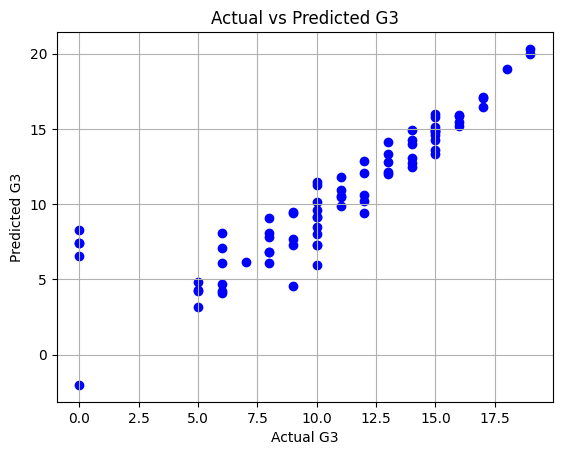

In [12]:
# Optional: Plot actual vs predicted
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted G3")
plt.grid(True)
plt.show()